<a href="https://colab.research.google.com/github/CoderArshia/C122/blob/main/C122_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
X,y = fetch_openml("mnist_784",version=1,return_X_y=True)
print(pd.Series(y).value_counts())
classes = ["0","1","2","3","4","5","6","7","8","9"]
nclasses=len(classes)


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


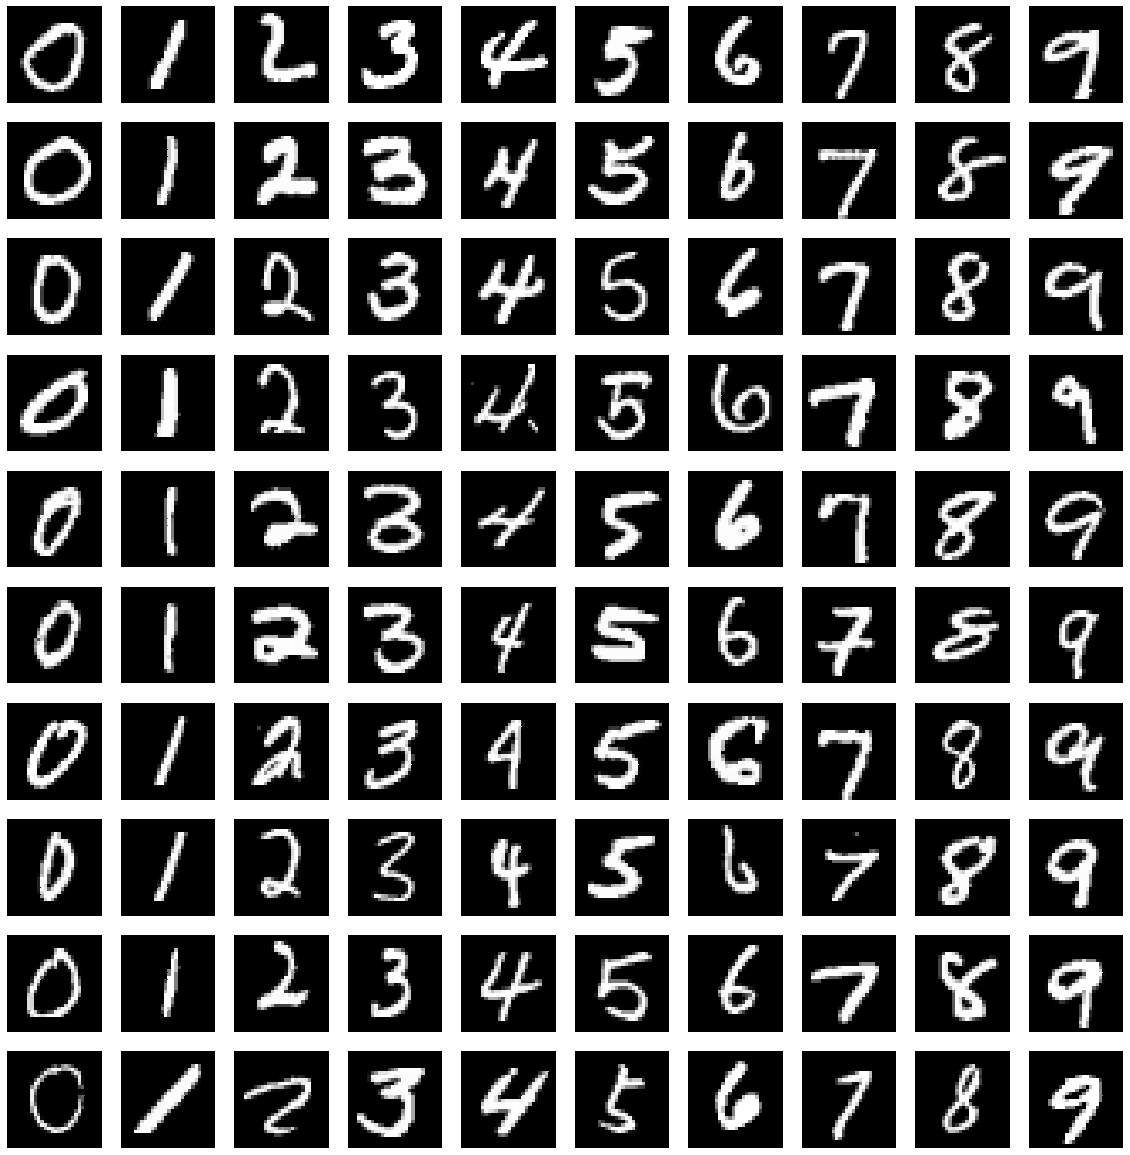

In [10]:
samples=10
figure=plt.figure(figsize=(nclasses*2,(1+samples*2)))
idx_cls=0

for cls in classes:
  idxs=np.flatnonzero(y==cls)
  idxs=np.random.choice(idxs,samples,replace=False)
  i = 0

  for idx in idxs:
    plt_idx=i*nclasses+idx_cls+1
    p = plt.subplot(samples,nclasses,plt_idx);
    p = sns.heatmap(np.reshape(X[idx],(28,28)),cmap=plt.cm.gray,xticklabels=False,yticklabels=False,cbar=False);
    p = plt.axis("off");
    i+=1

  idx_cls+=1


  

In [11]:
print(len(X))
print(len(X[0]))



70000
784


In [12]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split (X,y,random_state=9,train_size=7500,test_size = 2500)

X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

clf=LogisticRegression(solver="saga",multi_class="multinomial").fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [21]:
y_pred=clf.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

90.08


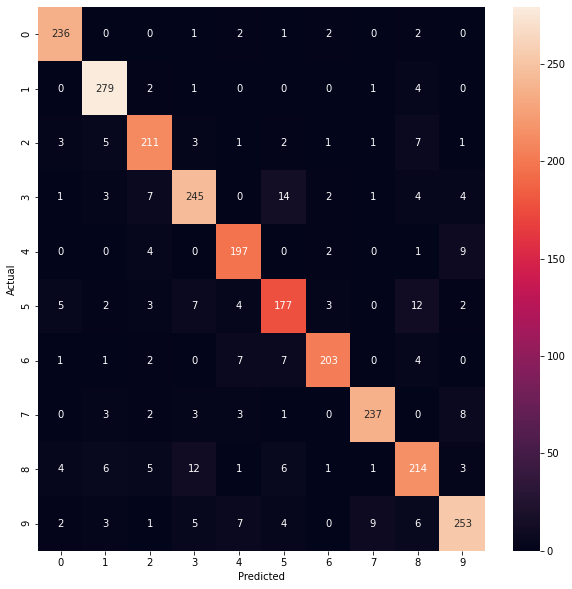

In [24]:
 cm=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
 p = plt.figure(figsize=(10,10));
 p = sns.heatmap(cm,annot=True,fmt="d",cbar=True)